# 통계 분석 기법을 이용한 가설 검정 

## 통계적 가설 검정이란? 
- 기술 통계와 추론 통계 
    - 기술 통계(Descriptive statistics) – 데이터를 요약해 설명하는 통계 기법 
        - ex) 사람들이 받는 월급을 집계해 전체 월급 평균 구하기 
    - 추론 통계(Inferential statistics) – 단순히 숫자를 요약하는 것을 넘어 어떤 값이 발생할 확률을 계산하는 통계 기법 
        - ex) 수집된 데이터에서 성별에 따라 월급에 차이가 있는 것으로 나타났을 때, 이런 차이가 우연히 발생할 확률을 계산 

### 추론 통계(Inferential statistics) 
    - 이런 차이가 우연히 나타날 확률이 작다 
        - -> 성별에 따른 월급 차이가 통계적으로 유의하다(statistically significant)고 결론 
    - 이런 차이가 우연히 나타날 확률이 크다 
        - -> 성별에 따른 월급 차이가 통계적으로 유의하지 않다(not statistically significant)고 결론 
    - 기술 통계 분석에서 집단 간 차이가 있는 것으로 나타났더라도 이는 우연에 의한 차이일 수 있음 
        - 데이터를 이용해 신뢰할 수 있는 결론을 내리려면 유의확률을 계산하는 통계적 가설 검정 절차를 거쳐야 함 

### 통계적 가설 검정
- 통계적 가설 검정(Statistical hypothesis test) 
   - 유의확률을 이용해 가설을 검정하는 방법 • 유의확률(Significance probability, p-value) 
- 실제로는 집단 간 차이가 없는데 우연히 차이가 있는 데이터가 추출될 확률 
- 분석 결과 유의확률이 크게 나타났다면 
     - '집단 간 차이가 통계적으로 유의하지 않다'고 해석 
     - 실제로 차이가 없더라도 우연에 의해 이 정도의 차이가 관찰될 가능성이 크다는 의미 
- 분석 결과 유의확률이 작게 나타났다면 
     - '집단 간 차이가 통계적으로 유의하다'고 해석 
     - 실제로 차이가 없는데 우연히 이 정도의 차이가 관찰될 가 능성이 작다, 우연이라고 보기 힘들다는 의미 

### t 검정 - 두 집단의 평균 비교 
t 검정(t-test) • 두 집단의 평균에 통계적으로 유의한 차이가 있는지 알아볼 때 사용하는 통계 분석 기법 

### compact 자동차와 suv 자동차의 도시 연비 t 검정 

In [2]:
# 데이터 준비 
mpg <- as.data.frame(ggplot2::mpg) 
 
library(dplyr) 
mpg_diff <- mpg %>%
select(class, cty) %>%
filter(class %in% c("compact", "suv")) 
 
head(mpg_diff) 

table(mpg_diff$class) 


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




,class,cty
,<chr>,<int>
1,compact,18
2,compact,21
3,compact,20
4,compact,21
5,compact,16
6,compact,18



compact     suv 
     47      62 

In [3]:
# t-test 
t.test(data = mpg_diff, cty ~ class, var.equal = T) 


	Two Sample t-test

data:  cty by class
t = 11.917, df = 107, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 5.525180 7.730139
sample estimates:
mean in group compact     mean in group suv 
             20.12766              13.50000 


- t-test 결과
- t = 11.917, df = 107, p-value < 2.2e-16 
- p-value < 2.2e-16 으로 유의수준하에서 귀무가설을 기각한다.
- compact 자동차와 suv 자동차의 평균 도시연비는 유의한 차이가 있다.

### 일반 휘발유와 고급 휘발유의 도시 연비 t 검정 

In [4]:
# 데이터 준비 
mpg_diff2 <- mpg %>%    select(fl, cty) %>%    filter(fl %in% c("r", "p"))  # r:regular, p:premium
  
table(mpg_diff2$fl) 


  p   r 
 52 168 

In [5]:
# t-test 
t.test(data = mpg_diff2, cty ~ fl, var.equal = T) 


	Two Sample t-test

data:  cty by fl
t = 1.0662, df = 218, p-value = 0.2875
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5322946  1.7868733
sample estimates:
mean in group p mean in group r 
       17.36538        16.73810 


- t-test 결과
- t = 1.0662, df = 218, p-value = 0.2875
- p-value = 0.2875 으로 유의수준하에서 귀무가설을 채택한다.
- 일반휘발유와 고급휘발유의 평균 도시연비는 차이가 없다

## 상관분석 - 두 변수의 관계성 분석 
- 상관분석(Correlation Analysis) 
    - 두 연속 변수가 서로 관련이 있는지 검정하는 통계 분석 기법 
    - 상관계수(Correlation Coefficient) – 두 변수가 얼마나 관련되어 있는지, 관련성의 정도를 나타내는 값 
    - 0~1 사이의 값을 지니고 1에 가까울수록 관련성이 크다는 의미 – 상관계수가 양수면 정비례, 음수면 반비례 관계 

### 실업자 수와 개인 소비 지출의 상관관계 

In [6]:
#데이터 준비 
economics <- as.data.frame(ggplot2::economics) 
#상관분석 
cor.test(economics$unemploy, economics$pce)


	Pearson's product-moment correlation

data:  economics$unemploy and economics$pce
t = 18.63, df = 572, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5608868 0.6630124
sample estimates:
      cor 
0.6145176 


## 상관행렬 히트맵 만들기 
- 상관행렬(Correlation Matrix) 
- 여러 변수 간 상관계수를 행렬로 타나낸 표 
- 어떤 변수끼리 관련이 크고 적은지 파악할 수 있음 

In [7]:
# 데이터 준비 
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [9]:
# 상관행렬 만들기 
car_cor <- cor(mtcars)  # 상관행렬 생성
round(car_cor, 2)       # 소수점 셋째 자 리에서 반올림해서 출력 

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.00,-0.85,-0.85,-0.78,0.68,-0.87,0.42,0.66,0.60,0.48,-0.55
cyl,-0.85,1.00,0.90,0.83,-0.70,0.78,-0.59,-0.81,-0.52,-0.49,0.53
disp,-0.85,0.90,1.00,0.79,-0.71,0.89,-0.43,-0.71,-0.59,-0.56,0.39
hp,-0.78,0.83,0.79,1.00,-0.45,0.66,-0.71,-0.72,-0.24,-0.13,0.75
drat,0.68,-0.70,-0.71,-0.45,1.00,-0.71,0.09,0.44,0.71,0.70,-0.09
wt,-0.87,0.78,0.89,0.66,-0.71,1.00,-0.17,-0.55,-0.69,-0.58,0.43
qsec,0.42,-0.59,-0.43,-0.71,0.09,-0.17,1.00,0.74,-0.23,-0.21,-0.66
vs,0.66,-0.81,-0.71,-0.72,0.44,-0.55,0.74,1.00,0.17,0.21,-0.57
am,0.60,-0.52,-0.59,-0.24,0.71,-0.69,-0.23,0.17,1.00,0.79,0.06
gear,0.48,-0.49,-0.56,-0.13,0.70,-0.58,-0.21,0.21,0.79,1.00,0.27


### 상관행렬 히트맵 만들기
- 히트맵(heat map) : 값의 크기를 색깔로 표현한 그래프 

In [10]:
# 패키지 준비
install.packages("corrplot") 
library(corrplot)

Installing package into 'C:/Users/admin/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\admin\AppData\Local\Temp\RtmpSqS4Mf\downloaded_packages


corrplot 0.84 loaded



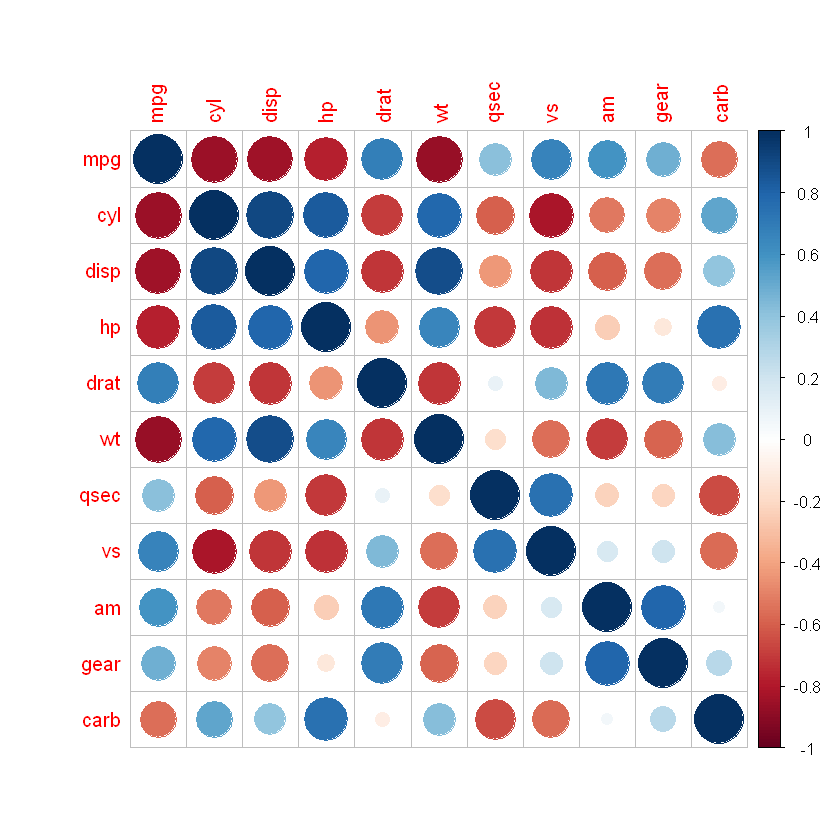

In [11]:
corrplot(car_cor)

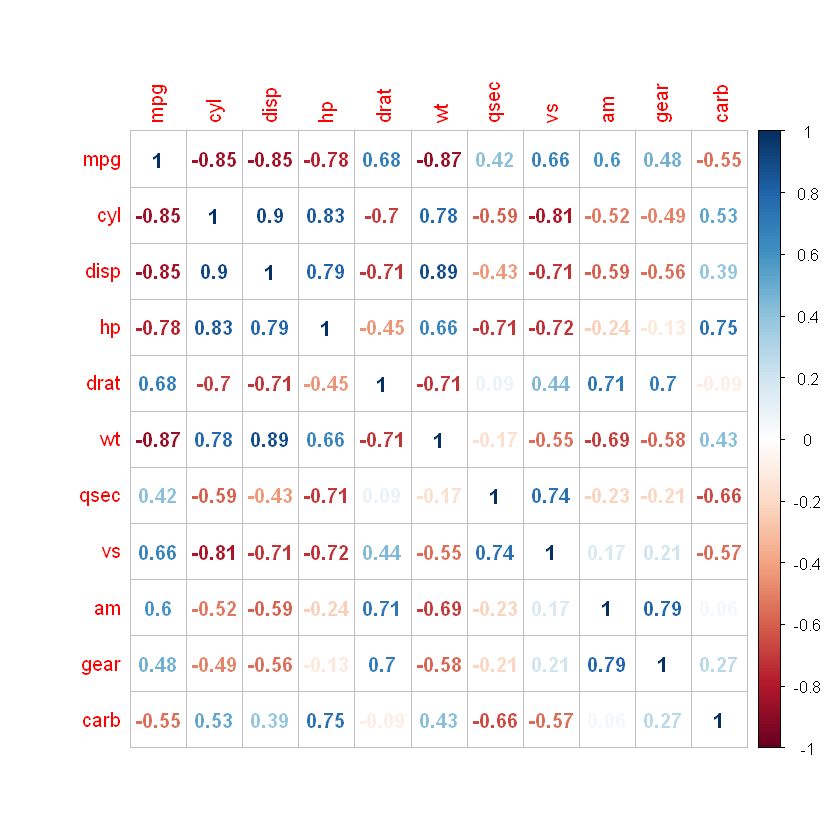

In [12]:
# 원 대신 상관계수 표시 
corrplot(car_cor, method = "number") 

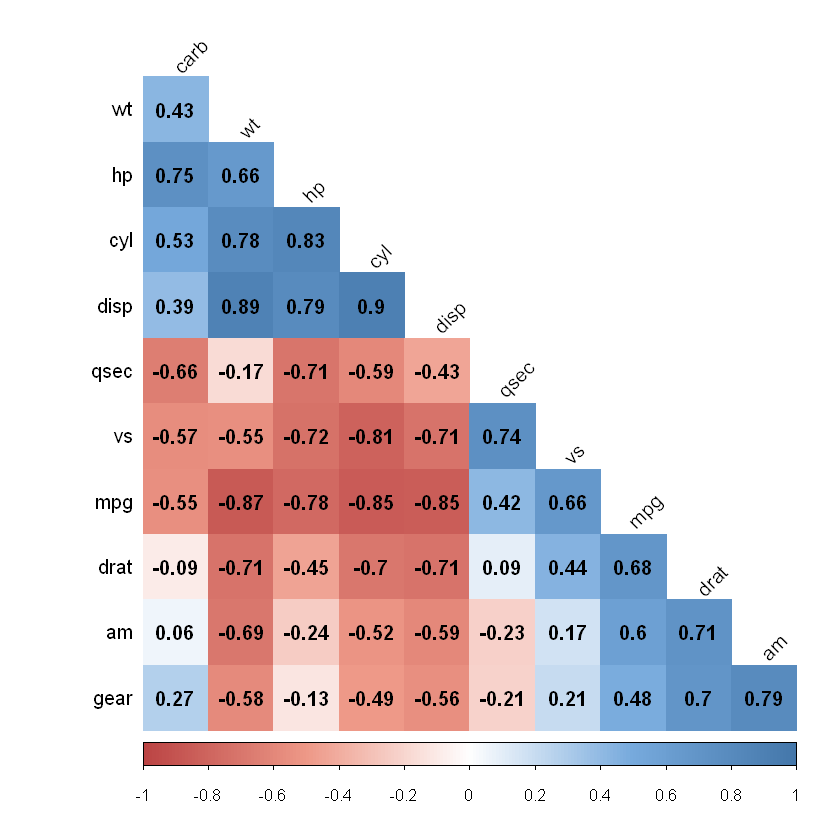

In [13]:
# 다양한 파라미터 지정하기 
col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA")) 
 
corrplot(car_cor,
         method = "color",       # 색깔로 표현
          col = col(200),         # 색상 200 개 선정
          type = "lower",         # 왼쪽 아래 행렬만 표시
          order = "hclust",       # 유사한 상관계수끼리 군집화
          addCoef.col = "black",  # 상관계수 색깔
          tl.col = "black",       # 변수명 색깔
          tl.srt = 45,            # 변수명 45 도 기울임
          diag = F)               # 대각 행렬 제외